# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Summary](#Summary)
    - [Metadata Handover](#Metadata-Handover)

## Sample Records Analysis

Swissbib has provided a data file with some records [[SwRe](./A_References.ipynb#swre)]. In this section, the data file will be loaded and some sample data records will be shown.

In [1]:
import os

path_data = './data'

# If Swissbib's data file happens to be present, the unzip command would halt the process.
if os.path.exists(os.path.join(path_data, 'job7r4A1.json')):
    # => Delete data file if present.
    os.remove(os.path.join(path_data, 'job7r4A1.json'))

! unzip $path_data/datafile.zip -d $path_data/

Archive:  ./data/datafile.zip
  inflating: ./data/job7r4A1.json    

The provided file has a size of more than 100MB. Due to its size, it cannot be checked in into a github repository. In order to check in the file nonetheless, it has been compressed with a standard zip format. The code cell above extracts the file and stores it in the same directory as the original zip file.

In [2]:
import json

records = []
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded {:,d}'.format(len(records)))

Number of data records loaded 183,407


The data has been read into a list of records. Let's have a look at the loaded data.

In [3]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '700': [], '800':...","{'110': [], '710': [], '810': []}",1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...","{'110': [], '710': [], '810': []}",1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '700': [], '800': [], ...","{'110': [], '710': [], '810': []}",1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [4]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"700":[],"800":[],"245c":["André Schluchter"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"700":[],"800":[],"245c":["von Werner Naegeli"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1986 

Now, the extracted data file is not needed anymore and can be removed with the goal to keep the original zip file, only.

In [5]:
# Swissbib's data file is not needed in unzipped form anymore
if os.path.exists(os.path.join(path_data, 'job7r4A1.json')):
    # Delete data file
    os.remove(os.path.join(path_data, 'job7r4A1.json'))

print('Number of records {:,d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183,407, number of attributes per record 23.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format        183407 non-null object
dtypes: object(23)
memory usage: 32.2+

Swissbib's data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [6]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '700': [], '800':...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes'], '700': ['SchayeghL...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph', ...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon'], '700': [], '...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [12]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate     {'110': ['St. Gallischer Hilfsverein'], '710':...
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [13]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

An analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to a specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [14]:
# Initialize the global dictionary
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [15]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the next chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [16]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

In [17]:
# Initialize list of dictionary item
columns_metadata_dict['data_analysis_columns'] = []

### 035liste

In [18]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [19]:
daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [20]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [21]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [22]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


3521      [(BGR)000181831, (RERO)R008707937, (IDSBB)0069...
115185                   [(OCoLC)259965226, (SBT)000915759]
137130    [(NEBIS)011151258, (VAUDS)991002866251102853, ...
51283     [(VAUD)991021071970602852, (CKB)10000000005850...
169982                                         [(CEO)25632]
122623                [(OCoLC)1088933544, (NEBIS)011367096]
10357     [(NEBIS)010292996, (RERO)R008116586, (IDSBB)00...
85698                 [(OCoLC)1086359437, (IDSLU)001344137]
152842                                         [(CEO)37042]
89223        [(SERSOL)ssib034519346, (WaSeSS)ssib034519346]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [23]:
columns_metadata_dict['strings_columns'] = ['century']

With its data extract [[SwRe](./A_References.ipynb#swre)], Swissbib forwards the year of publication of a bibliographic unit in attribute $\texttt{century}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)], if the bibliographic unit has been published in a specific year as may be the case for a regular book. If the bibliographic unit has been published during a time period, like for example a periodical, the first year of publication is stored [[WiCo2001](./A_References.ipynb#wico2001)].

In [24]:
daf.find_empty_in_column(df, columns_metadata_dict, 'century')

Number of records with filled century 183407, with missing century 0 => 100.0%


Attribute $\texttt{century}$ holds strings of length 4 that can predominantly be interpreted as year-dates [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples and the top-most quantity distribution are shown below.

In [25]:
df['century'].sample(n=15)

44272     2018
7775      1984
8706      2014
43749     2014
119089    1956
133994    1995
70634     1921
41196     2009
32013     2005
161202    1975
182882    2012
53249     1887
71099     1945
64323     2018
169125    2005
Name: century, dtype: object

In [26]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [27]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [28]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The list of year-dates without any unknown value is shown below.

In [29]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

Expecting the data extract provided is a statistically random sample, the following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

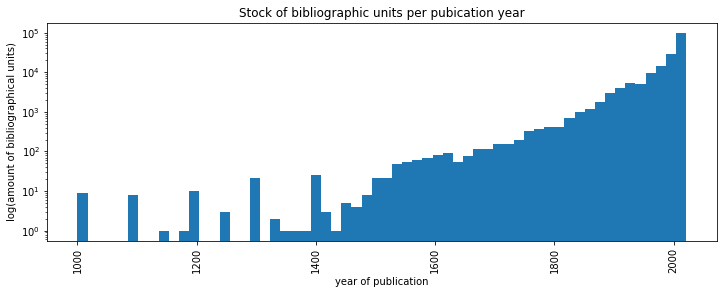

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

Care has to be taken with this attribute considering Swissbib's deduplication implementation. There, the attribute holds the century of publication instead of its full year [[WiCo2001](./A_References.ipynb#wico2001)]. The data extract offers with $\texttt{decade}$, see below, an additional attribute holding the same data as $\texttt{century}$. Even more, attributes $\texttt{exactDate}$ and $\texttt{pubyear}$ offer an extended version of attribute $\texttt{century}$. Due to these redundancies, the attribute will be dropped for the feature matrix and one of the extended attributes with the same data will be taken into account.

In [31]:
#columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [32]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographic unit of format map.

In [33]:
daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [34]:
daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [35]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

112185                      []
18402                       []
114727    [E0093310, N0471834]
31570                       []
112539                      []
27785     [E0092502, N0465328]
114735    [E0093317, N0472148]
126805    [E0065348, N0465701]
48811                       []
23380                       []
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [36]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

138916             [E0083628, E0083632, N0462733, N0462738]
145721             [E0053832, E0053842, N0465129, N0465123]
136954    [E0083620, E0083624, E0083624, N0462105, N0462...
131800             [E0072815, E0072819, N0460829, N0460834]
20694              [E0073306, E0073408, N0471208, N0471158]
144673             [E0071030, E0071454, N0472004, N0471948]
137877             [E0102620, E0102615, N0463834, N0463830]
17859              [E0095853, E0095853, N0464538, N0464538]
104201    [W1244400, E1722600, W1603200, N0492400, N0712...
132971             [E0073924, E0073928, N0465238, N0465239]
Name: coordinate, dtype: object

In [37]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [38]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed according to Swissbib's project team suggestion [[WiCo2001](./A_References.ipynb#wico2001)] with the help of a function $\texttt{.split}\_\texttt{coordinate}()$.

In [39]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{E}$.

In [40]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

35098     e0072219
132936    e0055230
104571    e0065253
147702    e0085027
27785     e0092502
25374     e0071440
114424    e0092552
114419    e0092559
130968    e0072819
104201    w1244400
112634    e0073012
12971     e0071603
110582    e0123100
113700    e0084423
103980    e0092614
22975     e0075900
59729     w1800000
114703    e0091844
20694     e0073306
50633     e0072956
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{N}$.

In [41]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

146677    n0470015
114689    n0470615
122770    n0714800
182735    n0465035
114809    n0465029
145722    n0462126
113752    n0471233
126762    n0464043
126759    n0463726
54208     n0470702
16277     n0490800
54397     n0505800
144428    n0473658
76809     n0605200
104934    n0532638
57083     n0371000
110585    n0474810
142009    n0415900
126748    n0464037
76442     n0354700
Name: coordinate_N, dtype: object

In [42]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attribute $\texttt{coordinate}$ is dropped.

In [43]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [44]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three different key value pairs. For the analysis in this subsection, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary using a special function $\texttt{.transform}\_\texttt{dictionary}\_\texttt{to}\_\texttt{list}()$. The values then come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process its elements into one single string of the new column.

In [45]:
df.corporate.sample(n=20)

73559                     {'110': [], '710': [], '810': []}
173606                    {'110': [], '710': [], '810': []}
148627                    {'110': [], '710': [], '810': []}
75220                     {'110': [], '710': [], '810': []}
101931    {'110': [], '710': ['Sotheby's (Hong Kong)'], ...
35369     {'110': [], '710': ['Ecclesia catholicaPapa'],...
52584                     {'110': [], '710': [], '810': []}
121694                    {'110': [], '710': [], '810': []}
44493                     {'110': [], '710': [], '810': []}
16676                     {'110': [], '710': [], '810': []}
76725                     {'110': [], '710': [], '810': []}
160940    {'110': ['Propaganda-Ausschuss für die Olympis...
20499                     {'110': [], '710': [], '810': []}
157837    {'110': ['Sports Illustrated (Chicago)'], '710...
43570                     {'110': [], '710': [], '810': []}
159778    {'110': ['Summer Olympic Games. Organizing Com...
128453                    {'110': [], '7

In [46]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%


Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%


Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographic units are units produced by persons, not corporates.

In [47]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [48]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [49]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,verein deutscher bibliothekareregionalverband ...,verein deutscher bibliothekareregionalverband ...
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,heilsarmeenationales hauptquartier bern,salvation armynationales hauptquartier
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [50]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

166963                             korean olympic committee
165520    united states olympic committee. division of c...
161809              scientific american medicine (new york)
165747               groupement d'intérêt public paris 2008
167277    summer olympic games. organizing committee. 30...
150240    fédération internationale de médecine sportive...
110045                          geological survey of canada
152962    summer olympic games. organizing committee. 12...
18730                    eidgenössische finanzmarktaufsicht
161457    association française pour un sport sans viole...
151844                      international olympic committee
152941    summer paralympic games. organizing committee....
167809                      international olympic committee
165857    summer olympic games. organizing committee. 18...
86081     schweizerische interessengemeinschaft für abfa...
167328                     comité de candidature paris 2012
162055                             assoc

In [51]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

111912                               starsvoices (riazzino)
182914     european society for environment and development
3778                                      kunsthalle bremen
93656                                          monty python
177215                                          essl museum
154693    conseil international pour l'éducation physiqu...
175312        comité national olympique et sportif français
46188                         springerlink (online service)
157492    international symposium for olympic research. ...
29703                                 annonische bibliothek
12382                                              enfoirés
85738                                               figures
34942                                    universität zürich
128769    bibliothèque cantonale et universitaire (lausa...
11427     komische oper berlinorchester, rundfunkchor be...
83059           eidgenössische technische hochschule zürich
49167                       ostinelli, c

In [52]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

106199                           hallwag kümmerly + frey
106189                           hallwag kümmerly + frey
145721             schweizbundesamt für landestopografie
110598                           hallwag kümmerly + frey
110581                           hallwag kümmerly + frey
94679                                          hécatombe
110582                           hallwag kümmerly + frey
47145     biochemical society (great britain).symposium.
30888              schweizbundesamt für landestopografie
106150                           hallwag kümmerly + frey
72532                                      werbung kiser
61510                            hallwag kümmerly + frey
106184                           hallwag kümmerly + frey
110589                           hallwag kümmerly + frey
72562                                      werbung kiser
110574                                         hema maps
106173                           hallwag kümmerly + frey
110593                         

In [53]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080     {'110': [], '710': [], '810': ['Wirtschaftsuni...
47145     {'110': ['Biochemical Society (Great Britain)S...
52134     {'110': [], '710': ['Kunsthandlung Helmut H. R...
94673     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94674     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94678     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94679     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94680     {'110': [], '710': ['Ensemble Batida', 'Hécato...
113869    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
113870    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
133706    {'110': ['Carnegie Endowment for International...
133739    {'110': [], '710': [], '810': ['DeutschlandVer...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

The contents of attribute $\texttt{corporate}$ results from varying interpretation and filling. Some institutions have used key 110 and others 710 as their leading corporate data field. Swissbib's recommendation is to concatenate the two remaining $\texttt{corporate}$ fields into one single $\texttt{corporate}$ field [[WiCo2001](./A_References.ipynb#wico2001)]. The two remaining attributes will be taken into one and will be processed to the feature matrix as one single attribute. This will be implemented in a separate function $\texttt{.concatenate}\_\texttt{corporate}\_\texttt{keys}()$, the result of which is shown below for some sample cases.

In [54]:
df = dpf.concatenate_corporate_keys(df)
df[['corporate_full', 'corporate_110', 'corporate_710']].loc[[0, 6, 1852, 14405, 183000, 183009]]

,corporate_full,corporate_110,corporate_710
0,,,
6,christkatholische kirchgemeinde (bern),,christkatholische kirchgemeinde (bern)
1852,the keywords project,the keywords project,
14405,zéphyr combo,zéphyr combo,zéphyr combo
183000,fbm communications (zürich) theater 11 (zürich),fbm communications (zürich),theater 11 (zürich)
183009,spinas civil voices (zürich) fairmed (bern),spinas civil voices (zürich),fairmed (bern)


In [55]:
len(df['corporate_full'].loc[0])

0

In [56]:
display(df.corporate_full[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20))
display(df.corporate_full[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20))

157065    summer youth olympic games. organizing committ...
51644     england and walessovereign (1625-1649 : charle...
165243                                               unesco
155574    summer olympic games. organizing committee. 9,...
152689    summer olympic games. organizing committee. 15...
155006                            chinese olympic committee
165746                      international olympic committee
161335    summer olympic games. organizing committee. 28...
170510                          olimpijski komite slovenije
93346                                              quintinò
99977                                schweizschweizer armee
20626                                        abegg-stiftung
158553    musée, bibliothèque et centre d'études olympiq...
160654                     association olympique canadienne
166877    fédération internationale de football association
150752           stichting olympische spelen amsterdam 1992
166500                           egyptia

15157                                                    u2
115757    schweizerische zentralstelle für baurationalis...
140334         ya pamphlet collection (library of congress)
145723    schweizerische naturforschende gesellschaftsch...
42759     organisation for economic co-operation and dev...
77165                            caves du manoir (martigny)
11700                              orchestre super matimila
164421                         united states postal service
80221                                     kunsthalle zürich
140683                   association of art historians (gb)
178247                                          bal (paris)
145185                schweizbundesamt für landestopografie
104268                          kohl verlag e.k. der verlag
145310             westminster choir, new york philharmonic
53738                              american nuclear society
181534    universität st. galleninstitut für systemische...
11435                              d sun

In [57]:
columns_metadata_dict['data_analysis_columns'].append('corporate_full')

### decade

In [58]:
columns_metadata_dict['strings_columns'].append('decade')

Attribute $\texttt{decade}$ holds identical data to attribute $\texttt{century}$, out of Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], see code cell below and its identical MARC 21 definition [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The purpose of the field in Swissbib's conventional deduplication implementation is to hold the decade of the year of origin of a bibliographic unit and store it for comparison [[WiCo2001](./A_References.ipynb#wico2001)].

In [59]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ with an extension of the data of this attribute. Therefore, attribute $\texttt{decade}$ will be dropped for further processing.

### docid

In [60]:
columns_metadata_dict['strings_columns'].append('docid')

In [61]:
daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [62]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [63]:
columns_metadata_dict['list_columns'].append('doi')

In [64]:
daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 9553, with missing doi 173854 => 5.2%


Attribute $\texttt{doi}$ is a digital object identifier. As specified in [[MARC](./A_References.ipynb#marc21)], the field holds several standard numbers [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The attribute holds a list of string elements. Some samples are shown below.

In [65]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1899         [10.5451/unibas-007052902]
1937         [10.5451/unibas-007052953]
4710           [10.14361/9783839445334]
10480        [10.5451/unibas-007052913]
11917       [10.1007/978-1-4939-6572-4]
15775    [10.5771/1439-880X-2018-3-362]
16124            [10.3931/e-rara-74297]
16194           [10.4324/9781138604391]
16212            [10.3931/e-rara-74297]
16219            [10.3931/e-rara-74297]
16222            [10.3931/e-rara-74297]
16244            [10.3931/e-rara-74297]
16245            [10.3931/e-rara-74297]
16256            [10.3931/e-rara-74297]
16265           [10.4324/9781315562193]
16301           [10.4324/9781315692845]
16354            [10.3931/e-rara-74439]
16356                  [10.3726/b14897]
16447           [10.4324/9781315150918]
16637          [10.1186/1478-4505-8-31]
Name: doi, dtype: object

In [66]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

87724                          [10.1038/s41467-018-07075-3]
123465    [10.3929/ethz-b-000322842, 10.1038/s41467-019-...
45520       [10.5167/uzh-162067, 10.1024/0040-5930/a000973]
22346                            [10.5075/epfl-thesis-9052]
49809      [10.5167/uzh-161742, 10.1103/physrevb.98.214301]
20821     [10.3929/ethz-b-000313287, 10.1093/femspd/fty082]
109304    [10.3929/ethz-b-000325573, 10.1038/s41598-018-...
149097                                [10.1055/a-0664-8619]
126576    [10.5167/uzh-169254, 10.1024/0036-7281.145.9.425]
96808                                [10.5169/seals-789854]
43584                           [10.1007/978-3-319-92892-0]
34451                                  [10.5167/uzh-160589]
113509     [10.3929/ethz-b-000326540, 10.1021/jacs.8b12471]
97629                                [10.5169/seals-791020]
110469                                 [10.1111/apps.12072]
97813                             [10.1126/science.aaw1280]
148096    [10.5167/uzh-168916, 10.1080/1

In [67]:
df.loc[51889]

docid                                                     554871254
035liste          [(VAUD)991021210193902852, (CKB)41000000059582...
isbn                                                [3-319-93133-4]
ttlfull           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
ttlpart           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
person            {'100': [], '700': ['ShakoorAbdul', 'CatoKerry...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    2019    
decade                                                         2019
century                                                        2019
exactDate                                                  2019    
edition                                               1st ed. 2019.
part                                                             []
pages                               [1 online resource (122 pages)]
volumes                             [1 online re

In [68]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.doi.apply(lambda x : len(x))))

9,553 records hold 1 list element(s).
2,232 records hold 2 list element(s).


=> Maximum number of list elements 2


Swissbib's deduplication implementation compares only real doi identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real doi identifiers can be found with the help of a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a doi can be identified as a string starting with '10.'. Furthermore, each row in the data has a maximum of 1 real doi identifier [[WiCo2001](./A_References.ipynb#wico2001)]. This logic will be used to isolate the real doi from all non-doi identifiers in a row. A function $\texttt{.reduce}\_\texttt{to}\_\texttt{doi}\_\texttt{element}()$ has been implemented that takes care of this isolation and stores only real doi identifiers in attribute $\texttt{doi}$.

In [69]:
df = dpf.reduce_to_attrib_element(df, 'doi')

df.doi[df.doi.apply(lambda x : len(x)>0)].sample(n=20)

180234        10.1007/978-3-642-32238-9
61178                10.5167/uzh-161408
45882     10.4159/harvard.9780674864856
34421                10.5167/uzh-162981
97671              10.5169/seals-791062
96471              10.5169/seals-790407
115861         10.3929/ethz-b-000322281
45683             10.1524/9783486714869
97378              10.5169/seals-790660
74508             10.2166/9781780401546
90121             10.3138/9781487586027
126570               10.5167/uzh-169248
62123              10.3931/e-rara-74628
96495              10.5169/seals-790117
44646         10.1007/978-3-319-94355-8
41377     10.4159/harvard.9780674189249
39521     10.4159/harvard.9780674421806
126527               10.5167/uzh-157195
97272              10.5169/seals-790747
34275                 10.5167/uzh-76998
Name: doi, dtype: object

In [70]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [71]:
columns_metadata_dict['strings_columns'].append('edition')

In [72]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [73]:
edition_sample_index = df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=20).index
df.edition.loc[edition_sample_index]

148342                                         3rd ed
131033                                Originalausgabe
80953                                  Second edition
16145                                      1. Auflage
132847                                Originalausgabe
85496                                   Lizenzausgabe
67007                        Ed. revue et corrigée 5e
116694                                     1. Auflage
47961                                    2019 edition
178552                   Neusatz der Ausgabe von 1947
180609    The twelfth edition, corrected and enlarged
4160                                         6. Aufl.
143650                                     1. Auflage
7176                                         1. Aufl.
87259                                      1. Auflage
126882                                     1. Auflage
43236                                         1st ed.
129735                              Second impression
73138                     3.

Swissbib's deduplication logic normalizes this attribute strongly [[WiCo2001](./A_References.ipynb#wico2001)]. Goal of their normalization process is to treat different variants of the edition statements in the same way. The normalization comprises mainly extracting and isolating number digits out of the original string of the attribute. But also, they convert words expressing numbers to number digits. The first part of their normalization process, extracting number digits, will be done as well in this capstone project. For this purpose, a special function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string}()$ has been implemented for attribute $\texttt{edition}$.

In [74]:
df = dpf.isolate_number_from_string(df, 'edition')
df.edition.loc[edition_sample_index]

148342       3
131033        
80953         
16145        1
132847        
85496         
67007        5
116694       1
47961     2019
178552    1947
180609        
4160         6
143650       1
7176         1
87259        1
126882       1
43236        1
129735        
73138        3
126316       2
Name: edition, dtype: object

In [75]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 16390, with missing edition 167017 => 8.9%


As a result of this processing of attribute $\texttt{edition}$, the numer of filled rows has been reduced further.

In [76]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [77]:
columns_metadata_dict['strings_columns'].append('exactDate')

Attribute $\texttt{exactDate}$ holds the same values like attribute $\texttt{pubyear}$, see below. In comparison with $\texttt{century}$ and $\texttt{decade}$, the full years of publication of a bibliographic unit are stored in the first four digits of the attribute [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. For bibliographic units that appear over a time period, the second four digits correspond to the last year of publication. In case of units that appear within one year, the second four digits may hold the copyright date or the original year of publication of a reprint may be stored, instead. For some bibliographic units, it is possible that the attribute holds month and day indication instead of a year in the last four digits [[WiCo2001](./A_References.ipynb#wico2001)].

In [78]:
daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [79]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [80]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [81]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {'-', ' ', 'u'}


In [82]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


In [83]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


Non-digit characters are {'u'}


In [84]:
df.loc[183319]

docid                                                     556987284
035liste                         [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                             []
ttlfull           {'245': ['Altered limbic and autonomic process...
ttlpart           {'245': ['Altered limbic and autonomic process...
person            {'100': [], '700': ['TemplinChristian', 'Hängg...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    20190414
decade                                                         2019
century                                                        2019
exactDate                                                  20190414
edition                                                            
part                                             [40(15):1183-1187]
pages                                                            []
volumes                                         

The MARC data declares explicitly the kind of value, the second four digits are about. This specification is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Swissbib treats such differences in a varying way in its deduplication implementation, depending on the specific kind of value. Due to its full information supply, attribute $\texttt{exactDate}$ is taken as is to the feature matrix. The attribute will be taken as full placeholder for the three attributes $\texttt{century}$, $\texttt{decade}$, and $\texttt{pubyear}$.

In [85]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [86]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis). Swissbib's deduplication implementation splits this attribute for its comparison logic and uses only parts of it [[WiCo2001](./A_References.ipynb#wico2001)].
- The full code is used for values starting with VM01, VM02, MU03, MU04, and CF01.
- The first four and last two digits are used for all other values of the attribute.

In [87]:
daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [88]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

109368    vm020353
71036     bk020000
62282     bk020000
106163    mp010300
52232     bk020000
115736    bk020000
62379     bk020000
106544    bk020053
89091     bk020053
160015    bk020000
Name: format, dtype: object

In [89]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [90]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

150326    
170121    
158073    
162341    
166729    
163497    
158796    
167699    
158353    
159839    
Name: format, dtype: object

In [91]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [92]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of a bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and an inferior reliability due to freedom of interpretation. For this capstone project, a different processing of the attribute compared to the Swissbib implementation is tested. The attribute is divided into two new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the six subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [93]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
112350,mu010000,mu,010000
83020,bk020300,bk,020300
60556,mu010100,mu,010100
3791,mu040100,mu,040100
160056,bk020000,bk,020000
63270,bk020053,bk,020053
171873,bk020000,bk,020000
121911,cr020453,cr,020453
154674,bk020000,bk,020000
18478,bk020000,bk,020000


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format}()$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py).

In [94]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [95]:
columns_metadata_dict['list_columns'].append('isbn')

In [96]:
daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, either the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [97]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

60785     [978-3-03796-447-7]
151960    [978-3-639-24810-4]
150522    [978-1-935928-83-6]
17792     [978-2-7101-3462-6]
173536        [2-85180-252-6]
92478     [978-3-03796-429-3]
179943    [978-2-940615-14-8]
34991     [978-2-7021-6329-0]
82832     [978-0-567-68082-2]
104513    [978-89-7581-514-0]
70577     [978-2-213-67129-1]
182234    [978-3-030-01334-9]
11894         [3-85874-019-5]
148618        [94-017-8795-6]
19761     [978-3-03897-259-4]
176565        [92-9160-063-6]
26657     [978-1-4408-6416-2]
24300             [2035-6137]
115724    [978-0-8129-9416-2]
91791     [978-3-8394-4430-6]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [98]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

83207                    [0-941920-29-1, 978-0-941920-29-2]
142122     [978-0-07-176236-6 (pbk.), 0-07-176236-1 (pbk.)]
41440     [978-3-11-047992-8 (softcover), 3-11-047992-3 ...
104970    [1-58046-278-2, 1-58046-362-2, 978-1-58046-278...
36053        [81-86622-28-4 (set), 978-81-86622-28-5 (set)]
128243    [0-429-25010-X, 1-281-89237-8, 9786611892371, ...
40402     [0-691-12741-7 (hbk.), 978-0-691-12741-5 (hbk....
131801                   [2-37680-025-0, 978-2-37680-025-5]
82022                    [978-3-901681-18-9, 3-901681-18-3]
172515                   [978-9947-979-05-1, 9947-979-05-9]
25054                [978-0-19-066317-9, 978-0-19-066318-6]
145537                       [0-7146-5254-7, 0-7146-8231-4]
121687                   [978-91-85945-53-5, 91-85945-53-6]
88215                    [978-1-5386-5616-7, 1-5386-5616-7]
36072        [81-86622-28-4 (set), 978-81-86622-28-5 (set)]
60308                    [978-3-96093-162-1, 3-96093-162-X]
41222        [978-0-691-00547-8, 978-1-4

In [99]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.isbn.apply(lambda x : len(x))))

80,688 records hold 1 list element(s).
29,073 records hold 2 list element(s).


3,762 records hold 3 list element(s).
2,331 records hold 4 list element(s).


519 records hold 5 list element(s).
398 records hold 6 list element(s).


173 records hold 7 list element(s).
156 records hold 8 list element(s).


84 records hold 9 list element(s).
76 records hold 10 list element(s).


51 records hold 11 list element(s).
43 records hold 12 list element(s).


29 records hold 13 list element(s).
26 records hold 14 list element(s).


19 records hold 15 list element(s).
18 records hold 16 list element(s).


10 records hold 17 list element(s).
9 records hold 18 list element(s).


8 records hold 19 list element(s).
7 records hold 20 list element(s).


7 records hold 21 list element(s).
7 records hold 22 list element(s).


7 records hold 23 list element(s).
7 records hold 24 list element(s).


5 records hold 25 list element(s).
4 records hold 26 list element(s).


3 records hold 27 list element(s).
3 records hold 28 list element(s).


3 records hold 29 list element(s).
3 records hold 30 list element(s).


1 records hold 31 list element(s).
1 records hold 32 list element(s).


1 records hold 33 list element(s).
1 records hold 34 list element(s).


1 records hold 35 list element(s).
1 records hold 36 list element(s).


1 records hold 37 list element(s).
1 records hold 38 list element(s).


1 records hold 39 list element(s).
1 records hold 40 list element(s).


1 records hold 41 list element(s).
1 records hold 42 list element(s).


=> Maximum number of list elements 42


In [100]:
max(df.isbn.apply(lambda x : len(x)))

42

In [101]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

86795     [84-00-08854-9, 84-00-08855-7, 84-00-08856-5, ...
172802    [0-08-043748-6, 0-08-044323-0, 0-08-044324-9, ...
57183     [978-4-7629-3591-6, 4-7629-3591-3, 978-4-7629-...
93578     [84-473-5019-3, 84-473-5020-7, 84-473-5021-5, ...
39158     [978-3-11-044748-4, 3-11-044748-7, 978-3-11-04...
133692    [0-444-82588-6 (set vols. 1A1B), 0-444-50728-0...
138458    [978-3-945893-05-0, 978-3-86281-062-8, 978-3-9...
127001    [978-1-315-76651-5, 1-315-76651-5, 1-317-66066...
45618     [1-85312-142-8 (set : Computational Mechanics ...
122530    [7-02-001888-2, 978-7-02-001888-8, 7-02-001889...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [102]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [103]:
columns_metadata_dict['list_columns'].append('ismn')

In [104]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 931, with missing ismn 182476 => 0.5%


Attribute $\texttt{ismn}$ originally held the same data like attribute $\texttt{doi}$ [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. This has been adjusted in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], though. Analogous to attribute $\texttt{doi}$, Swissbib's deduplication implementation compares only real ismn identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real ismn numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a real ismn number can be identified as a number starting with a letter 'm' (or 'M') or with the three number digits '979'. Each row in the data has a maximum of 1 real ismn identifyer [[WiCo2001](./A_References.ipynb#wico2001)].

In [105]:
i = 0
while len(df.ismn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.ismn.apply(lambda x : len(x))))

931 records hold 1 list element(s).


123 records hold 2 list element(s).


30 records hold 3 list element(s).


9 records hold 4 list element(s).


4 records hold 5 list element(s).


4 records hold 6 list element(s).


2 records hold 7 list element(s).


1 records hold 8 list element(s).


1 records hold 9 list element(s).


1 records hold 10 list element(s).


1 records hold 11 list element(s).


1 records hold 12 list element(s).


1 records hold 13 list element(s).


1 records hold 14 list element(s).


1 records hold 15 list element(s).


1 records hold 16 list element(s).


1 records hold 17 list element(s).


1 records hold 18 list element(s).


1 records hold 19 list element(s).


1 records hold 20 list element(s).


1 records hold 21 list element(s).


1 records hold 22 list element(s).


1 records hold 23 list element(s).


1 records hold 24 list element(s).


1 records hold 25 list element(s).


1 records hold 26 list element(s).


=> Maximum number of list elements 26


In [106]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

18787           [9790013230075, 9790013230075, M013230075]
21159           [9790013230068, M013230068, 9790013230068]
27903    [9790206300349, 9790206300448, 9790206300370, ...
36355        [9790261242936, 9790261242943, 9790261243407]
46239    [9790674521482, 9790674521499, 9790674521482, ...
Name: ismn, dtype: object

In [107]:
df_temp = dpf.transform_list_to_string(df.copy(), 'ismn')
df_temp.ismn[df_temp.ismn.str.contains('m[0-9]{8}', na=False, regex=True)]

1792                     m500173793
2004      m007093402, 9790007093402
2017                     m700185008
2029                     m001052481
2035      m007096410, 9790007096410
                    ...            
182638                   m501351428
182652                   m501357284
182674                   m501357925
182679                   m501351534
182890                   m008025112
Name: ismn, Length: 421, dtype: object

Analogous to attribute $\texttt{doi}$, a function $\texttt{.reduce}\_\texttt{to}\_\texttt{ismn}\_\texttt{element}()$ has been implemented that takes care of the isolation of the ismn identifier and stores only real ismn identifiers in attribute $\texttt{ismn}$.

In [108]:
df = dpf.reduce_to_attrib_element(df, 'ismn')
df.ismn[df.ismn.apply(lambda x : len(x))>0]

1791      9790201326702
1792         m500173793
2004         m007093402
2017         m700185008
2028      9790008010156
              ...      
182638       m501351428
182652       m501357284
182674       m501357925
182679       m501351534
182890       m008025112
Name: ismn, Length: 931, dtype: object

Unfortunately, the number of rows with a real ismn identifyer is vanishingly small. Attribute $\texttt{ismn}$ will be handed over for further processing in its preprocessed manner but the occurrence will have to be observed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [109]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [110]:
columns_metadata_dict['strings_columns'].append('musicid')

In [111]:
daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [112]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [113]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
mp       1
cr       1
Name: format_prefix, dtype: int64

In [114]:
musicid_sample_index = df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20).index
df.musicid.loc[musicid_sample_index]

49031                                      1 C 063-02 984 Q
11621                             Lucky Dog 10 - Slang50015
4890                                              CMP CD 85
140865    Contemporary OJCCD-341-2Contemporary Carrère 9...
143701                    100069396050002440605051889616290
14208                                    Zytglogge ZYT 4917
172382                                              F 2498F
12058                                          2564-60353-2
146644                                               88 028
95663                                             R.M.V.600
11310                                     Philips 456 506-2
84204                                              SXL 2017
4586                                          8717418505097
7659                                      EMI CDP 7 46413 2
9283                                       Ricercare RIC335
73296                         Virgin 724381033227 - CDV2945
1992                              Great 

In [115]:
df = dpf.isolate_number_from_string(df, 'musicid')
df['musicid'].loc[musicid_sample_index]

49031                                     1
11621                                    10
4890                                     85
140865                                  341
143701    100069396050002440605051889616290
14208                                  4917
172382                                 2498
12058                                  2564
146644                                   88
95663                                   600
11310                                   456
84204                                  2017
4586                          8717418505097
7659                                      7
9283                                    335
73296                          724381033227
1992                            73333358122
95788                                   280
8386                                      2
3042                                   0777
Name: musicid, dtype: object

Swissbib's deduplication logic isolates and extracts number digits out of the original string for this attribute [[WiCo2001](./A_References.ipynb#wico2001)]. This extraction of number digits will be done as well in this capstone project. For this purpose function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string}()$ will be used for attribute $\texttt{musicid}$. The attribute is taken to further processing steps.

In [116]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [117]:
columns_metadata_dict['list_columns'].append('pages')

In [118]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This extraction logic is described to be very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)] and will not be reimplemented for this capstone project. The pages information is part of the information in attribute $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [119]:
columns_metadata_dict['list_columns'] = ['part']

In [120]:
daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a part of a bibliographical unit as a unique number.

In [121]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

76248     [57. Jahrgang, H 2898 (November 2018), Seite 5...
75580                                       [Band 110, 110]
79915                                            [2, H. 35]
126581                                     [154(9):272-274]
48456                                                 [[2]]
26964                           [Heft 5 (4. Quartal, 2018)]
173202                                           [Band 132]
105144                                            [2019/25]
97285                                           [-/1(2000)]
136460                                             [Nr. 53]
98637                                     [11275, 2, 11275]
60662                                              [21, 21]
56359                                     [Volume 142, 142]
5030      [Jg. 179, H. 1 (2018), CD-Beilage, Nr. 141 (20...
167772                         [vol. 1, 2017, pp. 229-248.]
46926                                             [no. 148]
93032                                   

In [122]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [123]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [124]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [125]:
df['part'][df['part'].apply(lambda x : len(x)>0)].sample(n=25)

129176                                           86, 86
64531                                               202
18977                                                14
120165                                           vol. 2
180985                                          2019/36
87920                                                43
35818                            band 1, 6.-11. tausend
167703    no 62 (janvier-février-mars 2007), pp. 48-55.
22602                                          fasc. 14
45331                    2014, nr. 88 (15. april), s. 9
126679                                  pp. s1049-s1049
95668             vol. 48, fasc. 1 (1967), seiten 78-99
81887                  volume 47 (2018), seiten 331-343
148657                                               68
93190                                      volume 10796
171649                                          vol. 13
114537                                        vol. 5, 5
97630                                       8/2-

The model calculations will show a strong dependency on the number values of the attribute which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown.

In [126]:
samples_part = [102359, 168248, 126195, 177342, 178901, 172234, 180513]

print(df.part.iloc[samples_part])
df = dpf.extract_number_digits_from_string(df, 'part')
print(df.part.iloc[samples_part])

102359              no 250 (2019), annexe, no 95
168248    ahead of print, 10 may 2018, pp. 1-18.
126195                        vol. 8,2, vol. 8,2
177342                                    23, 23
178901                                  2019/228
172234                            26(2017), 7-20
180513                                      1345
Name: part, dtype: object


102359     250 2019 95
168248    10 2018 1 18
126195         8 2 8 2
177342           23 23
178901        2019 228
172234    26 2017 7 20
180513            1345
Name: part, dtype: object


In [127]:
print('Array of unique attribute values\n', df.part.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.part.unique())))

Array of unique attribute values
 ['' '1' '3' ... '867' '2009 201 223' '1962 92 106']

Total number of unique values 21,302


Attribute $\texttt{part}$ will be further processed in this way in the next chapters.

In [128]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [129]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal name statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process its elements into one single string of the new column.

In [130]:
df.person.sample(n=20)

82282     {'100': ['ZalogaSteven J.'], '700': ['Chasemor...
156525    {'100': [], '700': [], '800': [], '245c': ['Or...
46482     {'100': ['BühlerBenjamin'], '700': [], '800': ...
103895    {'100': ['BakerDavid'], '700': [], '800': [], ...
176537    {'100': ['MenkeChristoph'], '700': [], '800': ...
120539    {'100': [], '700': ['Marker'], '800': [], '245...
127224    {'100': [], '700': ['DavyUlrike', 'LenzenManue...
50861     {'100': ['FischerStefan'], '700': [], '800': [...
155536    {'100': [], '700': [], '800': [], '245c': ['pu...
67781     {'100': ['GiraudouxJean'], '700': [], '800': [...
40713     {'100': ['BaumgartenBernd'], '700': [], '800':...
37303     {'100': ['DiemerAndreas'], '700': [], '800': [...
125269    {'100': [], '700': ['JunkerChristoph'], '800':...
649       {'100': ['InchbaldElizabeth Simpson'], '700': ...
24864     {'100': [], '700': [], '800': [], '245c': ['pu...
37887     {'100': ['HolmesFrederic Lawrence'], '700': []...
58251     {'100': ['AubouyMiguel'], '700

In [131]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%


Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%


Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%


Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [132]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

34533                            pres. by erdinç akyıldırım
177447                                    carmelo mesa-lago
114461                                un film de fruit chan
178133    musique: d. chaïnski ; arr. q. chevigny ; paro...
140551                                         georg simmel
93490                                      [lilian alméras]
48027     produced by petroleum economist in association...
73827                     hrsg. von pascal hinny ; [suisse]
130851                                    tessa szyszkowitz
69770     madame de sévigné ; préf. de roger duchêne ; c...
39361                                      john von heyking
56084                                           serge bloch
102478                                   reinhard wachinger
145616                                              jarrett
150400    [hrsg. von der deutschen hochschule für körper...
161218                      international olympic committee
71702           niccolò tommaseo ; a cur

In [133]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

24132         torrianileonardo
98712      götschicarolin anna
31922            meesejonathan
50728           montangeronina
78812          levy-lenzludwig
178532           grifonejoseph
81387     saddhatissahammalava
123842            thomasoswald
139519           brockhuisjörn
153829      sterpelloneluciano
76290         nordhausenthomas
77001            classenshenri
140351                    hill
71055          alessiogiovanni
64929          wilmottemaurice
129172                   alves
53574             masaokashiki
125547          conderhartwell
30572                lenôtreg.
127798               rodenhans
Name: person_100, dtype: object

In [134]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

45646                   pisotsandra, bühllena, cranachlucas
77464                                       balicevicdidier
85784                                   anwaruddinsardar m.
6805      barcoolias, recoingaurélien, bramlyvirgile, ef...
34884                                       durninkatherine
151397                                        paisnerdaniel
8923                                                   lexx
103915                                      hübnerrenate e.
160384                                           holstadolf
11942     polackemmanuelle, hautièrerégis, laboutiquefra...
18065                                        hartmannjürgen
64698                                      laloyjean-robert
148839                                       schuhchristian
1588                              hillereduard, crusiusotto
63833                            coplandwilliam, hillthomas
95088                   curranstuart, crisafullililla maria
177242           duttabitopi, kakatibini

In [135]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

72640               clancy
37580                grimm
104659              gutman
105129          baccalario
129994             pelliot
176771        niebelschütz
109960    morris, goscinny
17359           sutherland
123720            telemann
62672             goscinny
72835              berlion
17247             legendre
148461               raule
128751     jungcarl gustav
134276                   g
90407              runberg
21739                derib
148205                nury
77438               clancy
135253          desmarteau
Name: person_800, dtype: object

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [136]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.,,jemisin
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix.

In [137]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [138]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [139]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [140]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [141]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [142]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

148172                                [Legend Press]
142723                          [Dölling und Galitz]
155003         [The Ice Hockey Federation of Russia]
120869           [Springer International Publishing]
76757                                 [notneK Music]
4465                                         [Huber]
103322              [Musée de l'Abbaye Sainte-Croix]
98608     [Association pour la sauvegarde de Morges]
133678                                        [West]
41908                [Union of Concerned Scientists]
129982                                      [[s.n.]]
177710                             [La Joie de lire]
142774                                      [[s.n.]]
164017                                      [[s.n.]]
82895                                     [4Trainer]
145671        [Dutton and Wentworth, State printers]
121070               [Springer Fachmedien Wiesbaden]
9401                              [PolyGram Records]
175440                    [Indiana University 

Two kinds of entries stand out as special in the sample data.

In [143]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [144]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will also be handled as regular publisher's description.

In [145]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [146]:
columns_metadata_dict['list_columns'] = ['pubword']

In [147]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [148]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [149]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [150]:
df[['exactDate', 'pubyear']]

,exactDate,pubyear
0,1992uuuu,1992
1,1986uuuu,1986
2,1923uuuu,1923
3,1947uuuu,1947
4,1991uuuu,1991
...,...,...
183402,2018uuuu,2018
183403,2019uuuu,2019
183404,1930uuuu,1930
183405,2000uuuu,2000


In [151]:
df[df.exactDate.str[:4] != df.pubyear.str[:4]]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c


The four digits of $\texttt{pubyear}$ hold identical data like the first four digits of field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [152]:
columns_metadata_dict['strings_columns'].append('scale')

In [153]:
daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [154]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [155]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


Like for attribute $\texttt{part}$, this attribute may hold a mixture of number digits and text strings. Even more, the scaling information may have preceeding '1:'.

In [156]:
df['scale'][df['scale'].apply(lambda x : len(x)>0)].sample(n=25)

113695                       25000
126790                       25000
35671             Echelle 1:25.000
114714                       50000
126802                       25000
3837                         75000
126853                       25000
126765                       25000
178472    [Echelle non déterminée]
114787                       25000
114750                       25000
111773                       50000
178471    [Echelle non déterminée]
110574                     1000000
51142     [Echelle non déterminée]
23519     [Echelle non déterminée]
13892                       275000
126822                       25000
110586                       35000
111190                        8000
5117                          5650
110593                     1000000
144628                      100000
131800                  2500025000
23436     [Echelle non déterminée]
Name: scale, dtype: object

To unify the possible values of this attribute to scaling numbers, two transformations have been implemented. The first transformation will extract only the number digits from the $\texttt{scale}$ string. The output will be a string with space separated numbers. This string will be the input for the second function, which removes explicitly strings '1 '. The effect of both functions applied one after the other is shown for some examples, below.

In [157]:
samples_scale = [178473, 122281, 27755, 23380, 31391, 35950]

print(df.scale.iloc[samples_scale])
df = dpf.extract_number_digits_from_string(df, 'scale')
df = dpf.extract_scaling_from_scale(df)
print(df.scale.iloc[samples_scale])

178473    [Echelle non déterminée]
122281                500000250000
27755                         8100
23380             Echelle 1:50 000
31391                     1:25 000
35950                      1700000
Name: scale, dtype: object


178473                
122281    500000250000
27755             8100
23380           50 000
31391           25 000
35950          1700000
Name: scale, dtype: object


The modified attribute will be taken over to further processing [[WiCo2001](./A_References.ipynb#wico2001)].

In [158]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [159]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [160]:
df.ttlfull.sample(n=20)

10691                  {'245': ['Robert Cray & Hi Rhythm']}
183273    {'245': ['Textbook of Medical Administration a...
115489                              {'245': ['Guidelines']}
35863     {'245': ['Briefwechsel 1799-1800, Nr. 3690-398...
24574     {'245': ['Freedom of religion, secularism, and...
118229    {'245': ['Reinhold Niebuhr to E.C. Williams, J...
52690     {'245': ['Linguistics Festival', 'May 2006, Br...
59545     {'245': ['Character-painting of Kumbhakarṇa in...
133036    {'245': ['Gert Wingårdh', 'thirty years of arc...
80899     {'245': ['Von der Familienfarm zum Industrieun...
149449    {'245': ['Accommodation Lillehammer '94', 'Jul...
151581    {'245': ['Land of second chances', 'the imposs...
53445                             {'245': ['Schattenmond']}
92054     {'245': ['Thuletuvalu', 'zwei Welten, eine Ges...
22954                    {'245': ['Willi Müller-Brittnau']}
178190    {'245': ['Collections', 'featuring property fr...
151765                    {'245': ['Gold

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process the list elements into one single string of the column.

In [161]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%


Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull}\_\texttt{245}$, is filled for every record in the data set. This makes the attribute a central attribute for record pair comparisons. Attribute $\texttt{ttlfull}\_\texttt{246}$ on the other hand is sparsely filled. Some samples are shown below.

In [162]:
df.ttlfull_245.sample(20)

163890                       l'aventure humaine du marathon
127817    a programmable control unit for a balloon born...
73372                                               islande
102147    three-dimensional data modelling for undergrou...
101744                           les hommes et la poussière
115711                    the lonesome bodybuilder, stories
155866    l'éducateur sportif, [préparation au brevet d'...
166362    united states olympic team media guide, games ...
14518                                    der baumhexen-club
43318     some problems in chemical kinetics and reactiv...
101097    hermetica ii, the excerpts of stobaeus, papyru...
152708    olympic chronicle, [a hundred years of the oly...
21465             medical ethics, a very short introduction
4680                                     gemischtes plättli
96526     an den grenzen des lebens, referat vom 29.3.94...
129991                                   debussy à la plage
35612     un insonne della letteratura, 

In [163]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

32830                                   jacques le sophiste
143053        canadian companies and the judicial committee
61715                     shakespeare & gesture in practice
49529     gentilhomme célibataire, le gentilhomme céliba...
63867     keeper his speech before the kings majesty and...
56585     renoir, père, fils, renoir père, fils, renoir ...
109800                                   2 papas, 2 enfants
34855     arbeitsproduktivität in der schweiz, productiv...
49931         convention sur le régime des voies navigables
177397                                          proceedings
20250     hommage à m. philipp keller, 1895-1980, philip...
57348                                int. j. mass spectrom.
63096     brief of the petition in behalf of the clothie...
32718                l'ebook dans l'epur, ebook dans l'epur
78243                                                   zfg
52476                                                 china
137318    medizinische gutachten des sie

In [164]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


According to [[WiCo2001](./A_References.ipynb#wico2001)], attribute $\texttt{ttlfull}\_\texttt{245}$ holds the title of a bibliographic unit as it is appears on its publication. Attribute $\texttt{ttlfull}\_\texttt{246}$ holds variations of the title that appear on the back of a unit or on the cover. Alternative diction and even some very special ideas of the people that have entered the data can be stored in this field.

As $\texttt{ttlfull}\_\texttt{245}$ can vary from $\texttt{ttlfull}\_\texttt{246}$, the two new columns will be used as a basis for the data for the feature matrix.

In [165]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [166]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [167]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [168]:
df.ttlpart.sample(n=20)

58912     {'245': ['Research handbook of investing in th...
38935     {'245': ['Enigma agency', 'Macht, Widerstand, ...
41149     {'245': ['MANAGING PALM OIL RISKS', 'A BRIEF F...
109946               {'245': ['Astérix chez les Helvètes']}
162527    {'245': ['California, Squaw Valley', 'United S...
163834    {'245': ['Sport and the natural environment', ...
14587                          {'245': ['Behind the wall']}
19904     {'245': ['Localisation inhabituelle d'une prim...
53833     {'245': ['Die Frau mit den hundert Schicksalen...
97574     {'245': ['Maximizing health outcomes through o...
112174                            {'245': ['Nevertheless']}
116968                {'245': ['Authority and Experience']}
37785     {'245': ['Characters of reductive groups over ...
84494     {'245': ['Transition metal catalyzed oxidative...
139918    {'245': ['Proceedings of the Bar and Officers ...
122715    {'245': ['Thermodynamics, quantum physics and ...
104072                              {'24

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [169]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [170]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [171]:
columns_metadata_dict['list_columns'].append('volumes')

In [172]:
daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages (see attribute $\texttt{pages}$ above), volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Swissbib extracts available information on the volume indication of a bibliographical unit out of its MARC data. This data normalization step is very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)]. Some examples of the attribute's filling are shown below.

In [173]:
df['volumes'].sample(n=15)

52424                 [1 online resource]
135902                           [448 S.]
150203                       [1 classeur]
95052                             [1 Bd.]
112348                        [403 pages]
45442                            [604 p.]
120125                [1 online resource]
164365                           [115 p.]
45814                         [59 Seiten]
157481            [95 p., [24] f. de pl.]
68992                          [2 séries]
46326     [1 online resource (349 pages)]
143102                [1 online resource]
97097                                  []
45939                  [Online-Ressource]
Name: volumes, dtype: object

In [174]:
print('=> Maximum number of list elements', max(df.volumes.apply(lambda x : len(x))))

=> Maximum number of list elements 3


In [175]:
df.volumes[df.volumes.apply(lambda x : len(x)==1)].sample(n=15)

177019                               [versch. Pag. (1987).]
148495    [1 online resource (XXXI, 676 p. 348 illus., 3...
112130                                              [   v.]
98544                                              [221 p.]
142205                                             [480 S.]
22359                                           [96 Seiten]
148511                                             [190 S.]
46472                         [1 online resource (volumes)]
53094                                       [Seiten 83-112]
4709                       [1 disque compact en 1 pochette]
152164                                               [7 p.]
157416                                             [159 p.]
169660                                             [310 p.]
39943                                   [1 online resource]
145424                                   [xxix, 296 Seiten]
Name: volumes, dtype: object

In [176]:
df.volumes[df.volumes.apply(lambda x : len(x)==2)].sample(n=15)

68888                                 [2 vol., 390, 395 p.]
105754                         [245 Seiten, Illustrationen]
92499                          [5 volumes, 5 flexi disques]
176424                                       [198 S., Ill.]
9375                            [1 CD (71'46), 1 DVD-Video]
60689                   [1 Partitur (7 Seiten), 68 Stimmen]
60552                   [1 Partitur (9 Seiten), 32 Stimmen]
33101              [1 online resource., 1 online resource.]
48888                                 [Basel, 28 S. : Ill.]
60695                   [1 Partitur (5 Seiten), 63 Stimmen]
44356     [1 online resource (Online-Ressource), 1 onlin...
33250              [1 online resource., 1 online resource.]
30573                [178 Seiten, Illustrationen, Tabellen]
46498     [1 online resource (Online-Ressource), 1 onlin...
39815     [1 online resource (Online-Ressource), 1 onlin...
Name: volumes, dtype: object

In [177]:
df.volumes[df.volumes.apply(lambda x : len(x)==3)].head()

73897                          [XI, 213 S., Portr., 23 cm]
80258    [1 Partitur (5 Seiten), 32 Stimmen, Wiedlisbac...
Name: volumes, dtype: object

In [178]:
df.volumes.loc[126736]

['XXII, 205 Seiten, XIX Blätter Tafeln']

In [179]:
df.volumes.loc[94679]

['1 flexi disque', '1 volume (sans pagination)']

Attribute $\texttt{volumes}$ comes along as a list of string elements. A function for data preparation has been written to extract all elements out of the list and store them as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [180]:
df = dpf.transform_list_to_string(df, 'volumes')

In [181]:
df['volumes'].sample(n=25)

163175                                 228 p.
58564                               36 seiten
46929           1 online resource (568 pages)
114307                                 bd. 1-
90585                     1 vol. (non paginé)
125221                              51 seiten
152417                                 284 p.
133359                                  2 bd.
169808                                 327 p.
148633                            xx, 1019 s.
151089                                 107 p.
7479                       1 partitur (36 s.)
89030                       1 online resource
23639                                        
124851                       viii, 242 seiten
110583                              111 pages
178532                                 464 p.
51415                                [192] p.
109651                                   2 v.
34112                                        
127561                                       
182029                     1 onlin

Analogous to attribute $\texttt{part}$, the model calculations will show a strong dependency on the number values of attribute $\texttt{volumes}$ which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown below.

In [182]:
sample_volumes = [14608, 32325, 50711, 27489, 65788, 142225]

print(df.volumes.iloc[sample_volumes])
df = dpf.extract_number_digits_from_string(df, 'volumes')
print(df.volumes.iloc[sample_volumes])

14608                                      1 disque compact
32325                                                303 p.
50711                                        xx, 488 seiten
27489                                   [1] pl., 36, 425 s.
65788                                            iv, 215 p.
142225    1 online resource (xix, 254 s. 133 abb., 128 a...
Name: volumes, dtype: object


14608                 1
32325               303
50711               488
27489          1 36 425
65788               215
142225    1 254 133 128
Name: volumes, dtype: object


In [183]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['102 114' '43' '75' ... '394 40' '2 327' '26 7']

Total number of unique values 11,150


The attribute will be further processed in this way in the chapters to come.

In [184]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. Out of this analysis, the attributes have been identified that are considered to be relevant for comparison. The list of these attributes is shown below.

In [185]:
columns_metadata_dict['data_analysis_columns']

['coordinate_E',
 'coordinate_N',
 'corporate_full',
 'doi',
 'edition',
 'exactDate',
 'format_prefix',
 'format_postfix',
 'isbn',
 'ismn',
 'musicid',
 'part',
 'person_100',
 'person_700',
 'person_245c',
 'pubinit',
 'scale',
 'ttlfull_245',
 'ttlfull_246',
 'volumes']

During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [186]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in its role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter as input. 

In [187]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)